In [1]:
import pandas as pd
df = pd.read_csv('input/Pokemon.csv')
# prepare data
types = df['Type 1'].isin(['Grass', 'Fire', 'Water'])
drop_cols = ['Type 1', 'Type 2', 'Generation', 'Legendary', '#']
df = df[types].drop(columns = drop_cols)
df.head()

,Name,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,Bulbasaur,318,45,49,49,65,65,45
1,Ivysaur,405,60,62,63,80,80,60
2,Venusaur,525,80,82,83,100,100,80
3,VenusaurMega Venusaur,625,80,100,123,122,120,80
4,Charmander,309,39,52,43,60,50,65


In [2]:
from sklearn.cluster import KMeans
import numpy as np
# k means
kmeans = KMeans(n_clusters=3, random_state=0)
df['cluster'] = kmeans.fit_predict(df[['Attack', 'Defense']])
# get centroids
centroids = kmeans.cluster_centers_
cen_x = [i[0] for i in centroids]
cen_y = [i[1] for i in centroids]
## add to df
df['cen_x'] = df.cluster.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2]})
df['cen_y'] = df.cluster.map({0:cen_y[0], 1:cen_y[1], 2:cen_y[2]})
# define and map colors
colors = ['#DF2020', '#81DF20', '#2095DF']
df['c'] = df.cluster.map({0:colors[0], 1:colors[1], 2:colors[2]})

C:\Users\Антон\PycharmProjects\cluster_vizualization\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


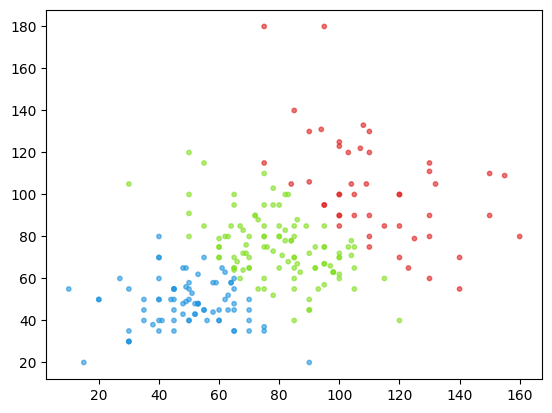

In [3]:
import matplotlib.pyplot as plt
plt.scatter(df.Attack, df.Defense, c=df.c, alpha = 0.6, s=10)

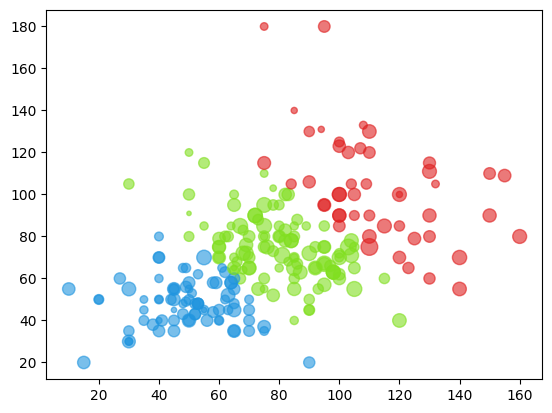

In [4]:
plt.scatter(df.Attack, df.Defense, c=df.c, s=df.Speed, alpha = 0.6)

C:\Users\Антон\PycharmProjects\cluster_vizualization\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


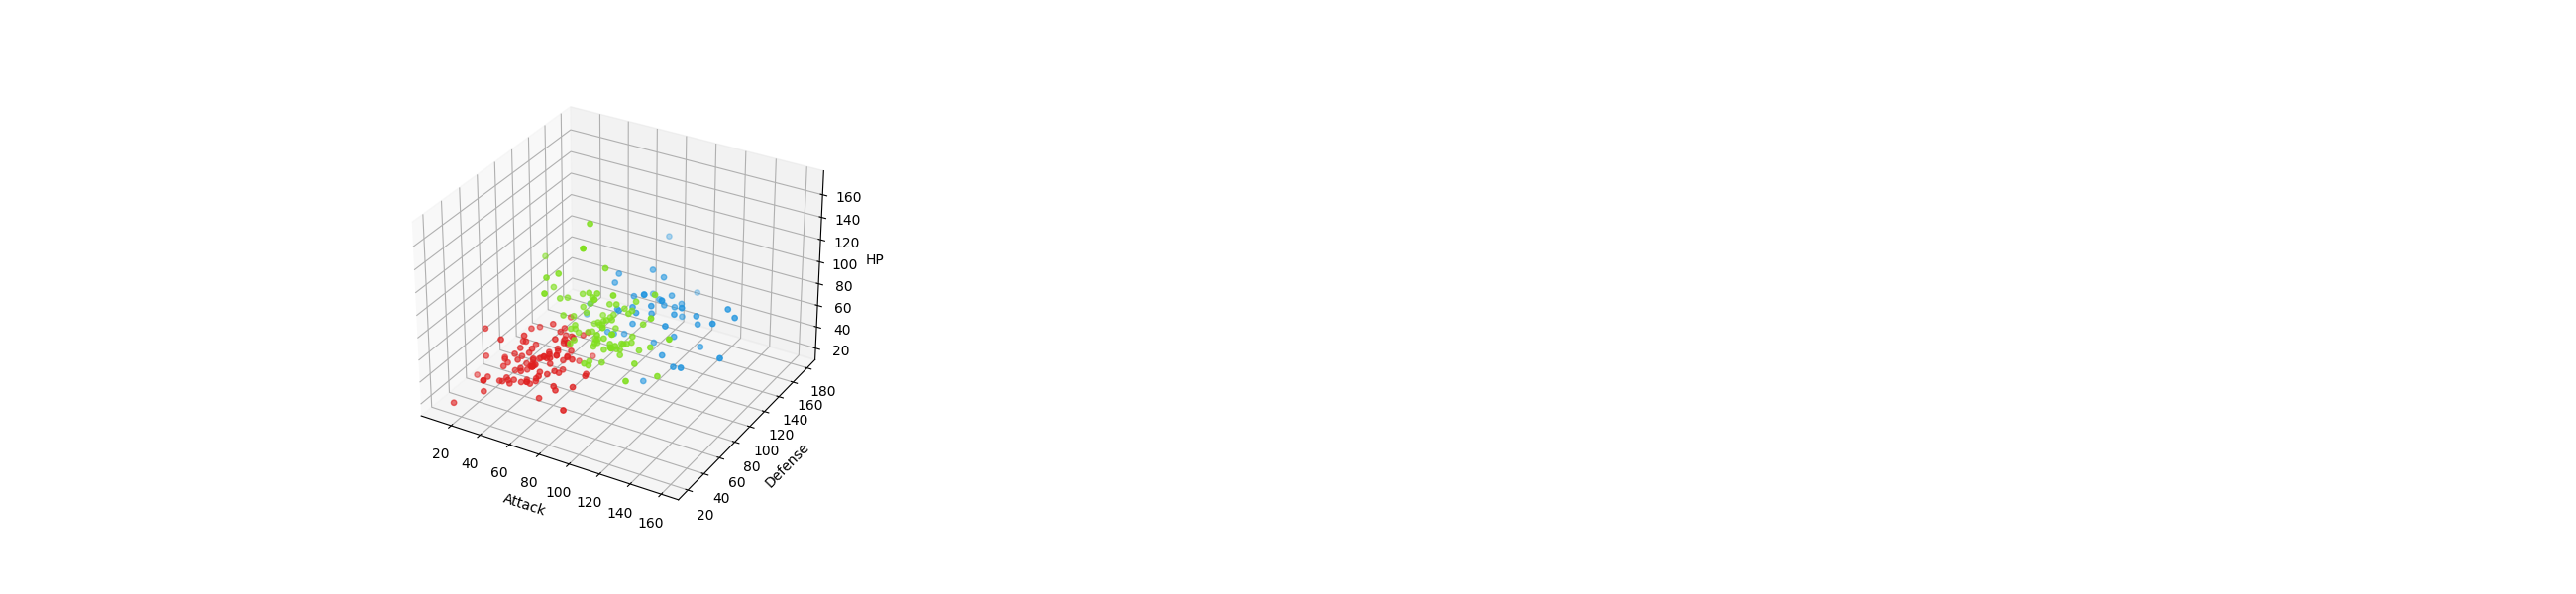

In [5]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib widget
colors = ['#DF2020', '#81DF20', '#2095DF']
kmeans = KMeans(n_clusters=3, random_state=0)
df['cluster'] = kmeans.fit_predict(df[['Attack', 'Defense', 'HP']])
df['c'] = df.cluster.map({0:colors[0], 1:colors[1], 2:colors[2]})
fig = plt.figure(figsize=(26,6))
ax = fig.add_subplot(131, projection='3d')
ax.scatter(df.Attack, df.Defense, df.HP, c=df.c, s=15)
ax.set_xlabel('Attack')
ax.set_ylabel('Defense')
ax.set_zlabel('HP')
plt.show()

C:\Users\Антон\PycharmProjects\cluster_vizualization\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0, 0.5, 'Defense')

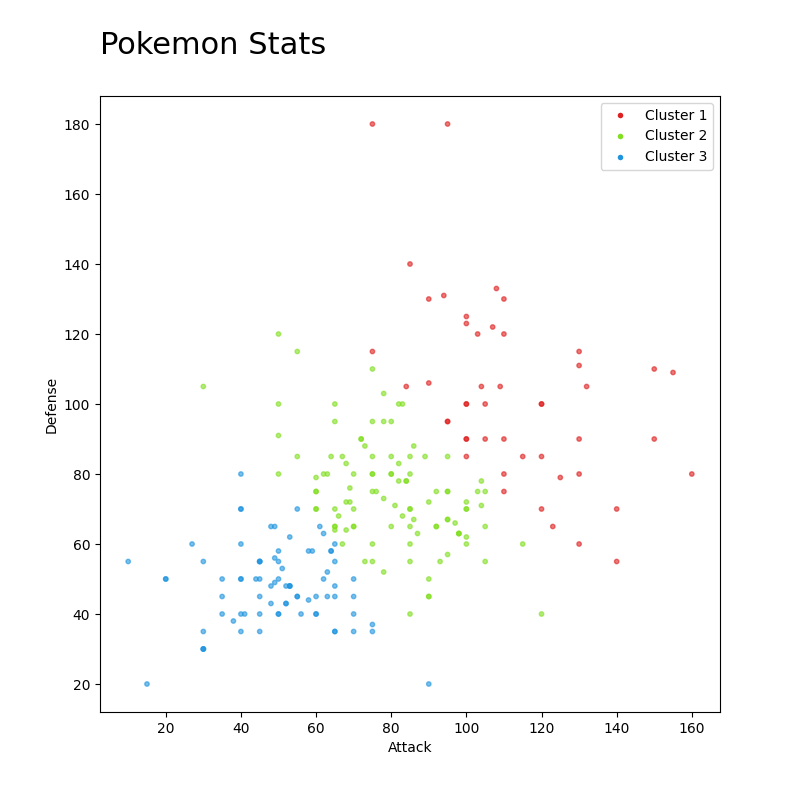

In [6]:
### BUILD A TWO DIMENSIONS CLUSTER AGAIN ###
# k means
kmeans = KMeans(n_clusters=3, random_state=0)
df['cluster'] = kmeans.fit_predict(df[['Attack', 'Defense']])
# get centroids
centroids = kmeans.cluster_centers_
cen_x = [i[0] for i in centroids]
cen_y = [i[1] for i in centroids]
## add to df
df['cen_x'] = df.cluster.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2]})
df['cen_y'] = df.cluster.map({0:cen_y[0], 1:cen_y[1], 2:cen_y[2]})
# define and map colors
colors = ['#DF2020', '#81DF20', '#2095DF']
df['c'] = df.cluster.map({0:colors[0], 1:colors[1], 2:colors[2]})
#####PLOT#####
from matplotlib.lines import Line2D
fig, ax = plt.subplots(1, figsize=(8,8))
# plot data
plt.scatter(df.Attack, df.Defense, c=df.c, alpha = 0.6, s=10)
# create a list of legend elemntes
## markers / records
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Cluster {}'.format(i+1),
               markerfacecolor=mcolor, markersize=5) for i, mcolor in enumerate(colors)]
# plot legend
plt.legend(handles=legend_elements, loc='upper right')
# title and labels
plt.title('Pokemon Stats\n', loc='left', fontsize=22)
plt.xlabel('Attack')
plt.ylabel('Defense')

Text(0, 0.5, 'Defense')

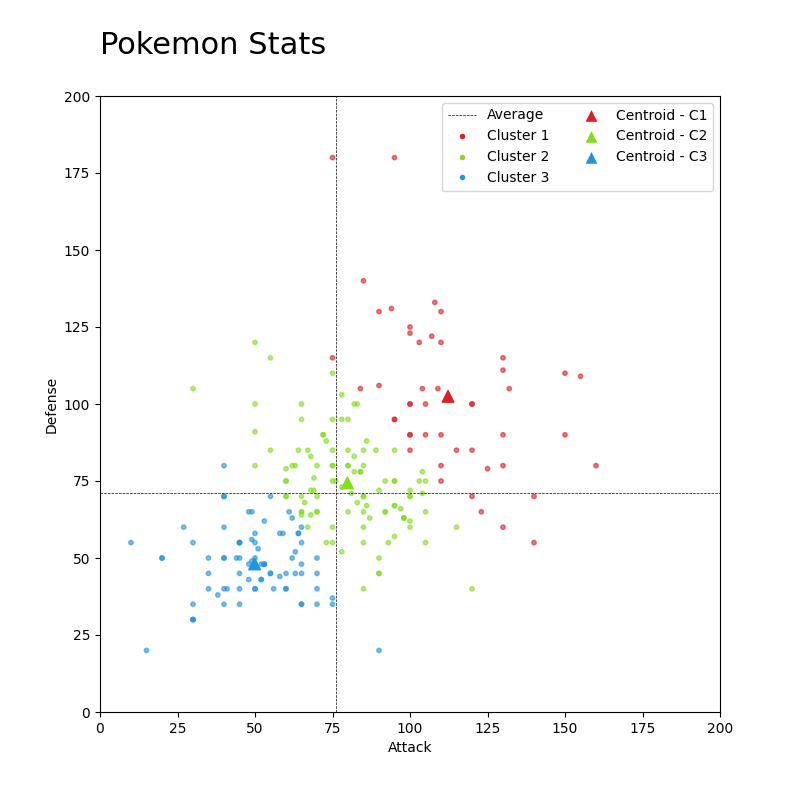

In [7]:
from matplotlib.lines import Line2D
fig, ax = plt.subplots(1, figsize=(8,8))
# plot data
plt.scatter(df.Attack, df.Defense, c=df.c, alpha = 0.6, s=10)
# plot centroids
plt.scatter(cen_x, cen_y, marker='^', c=colors, s=70)
# plot Attack mean
plt.plot([df.Attack.mean()]*2, [0,200], color='black', lw=0.5, linestyle='--')
plt.xlim(0,200)
# plot Defense mean
plt.plot([0,200], [df.Defense.mean()]*2, color='black', lw=0.5, linestyle='--')
plt.ylim(0,200)
# create a list of legend elemntes
## average line
legend_elements = [Line2D([0], [0], color='black', lw=0.5, linestyle='--', label='Average')]
## markers / records
cluster_leg = [Line2D([0], [0], marker='o', color='w', label='Cluster {}'.format(i+1),
               markerfacecolor=mcolor, markersize=5) for i, mcolor in enumerate(colors)]
## centroids
cent_leg = [Line2D([0], [0], marker='^', color='w', label='Centroid - C{}'.format(i+1),
            markerfacecolor=mcolor, markersize=10) for i, mcolor in enumerate(colors)]
# add all elements to the same list
legend_elements.extend(cluster_leg)
legend_elements.extend(cent_leg)
# plot legend
plt.legend(handles=legend_elements, loc='upper right', ncol=2)
# title and labels
plt.title('Pokemon Stats\n', loc='left', fontsize=22)
plt.xlabel('Attack')
plt.ylabel('Defense')

Text(0, 0.5, 'Defense')

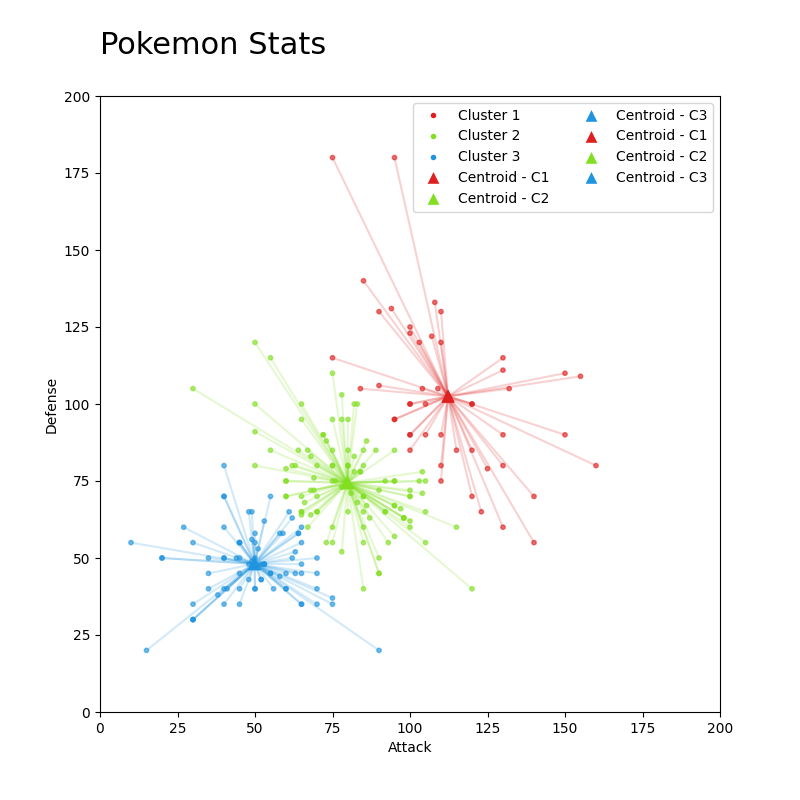

In [8]:
fig, ax = plt.subplots(1, figsize=(8,8))
# plot data
plt.scatter(df.Attack, df.Defense, c=df.c, alpha = 0.6, s=10)
# plot centroids
plt.scatter(cen_x, cen_y, marker='^', c=colors, s=70)
# plot lines
for idx, val in df.iterrows():
    x = [val.Attack, val.cen_x,]
    y = [val.Defense, val.cen_y]
    plt.plot(x, y, c=val.c, alpha=0.2)
# legend
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Cluster {}'.format(i+1),
                   markerfacecolor=mcolor, markersize=5) for i, mcolor in enumerate(colors)]
legend_elements.extend([Line2D([0], [0], marker='^', color='w', label='Centroid - C{}'.format(i+1),
            markerfacecolor=mcolor, markersize=10) for i, mcolor in enumerate(colors)])
legend_elements.extend(cent_leg)
plt.legend(handles=legend_elements, loc='upper right', ncol=2)
# x and y limits
plt.xlim(0,200)
plt.ylim(0,200)
# title and labels
plt.title('Pokemon Stats\n', loc='left', fontsize=22)
plt.xlabel('Attack')
plt.ylabel('Defense')

(0.0, 200.0)

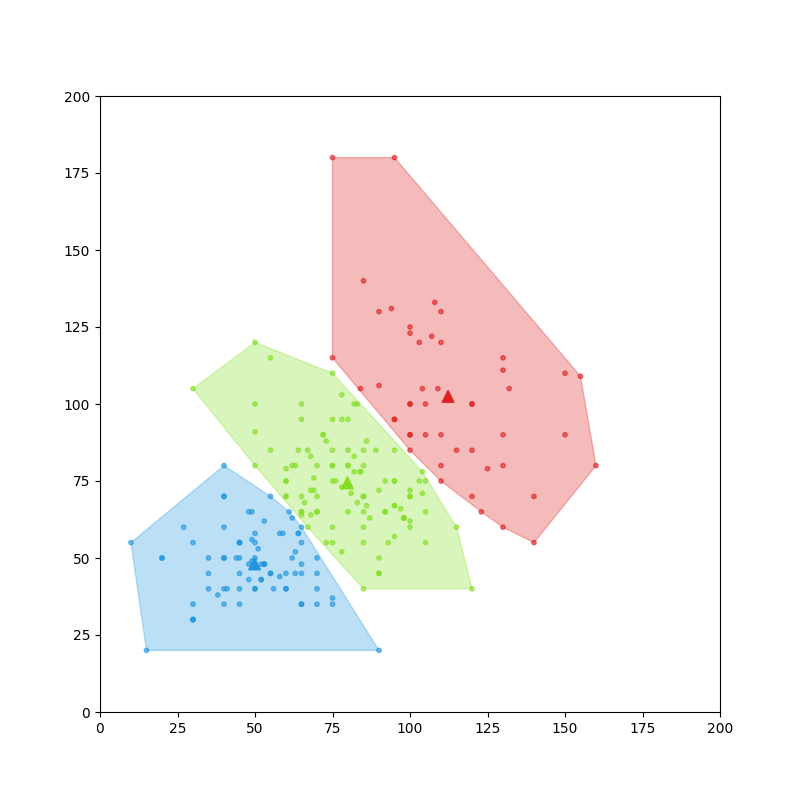

In [9]:
from scipy.spatial import ConvexHull
import numpy as np
fig, ax = plt.subplots(1, figsize=(8,8))
# plot data
plt.scatter(df.Attack, df.Defense, c=df.c, alpha = 0.6, s=10)
# plot centers
plt.scatter(cen_x, cen_y, marker='^', c=colors, s=70)
# draw enclosure
for i in df.cluster.unique():
    points = df[df.cluster == i][['Attack', 'Defense']].values
    # get convex hull
    hull = ConvexHull(points)
    # get x and y coordinates
    # repeat last point to close the polygon
    x_hull = np.append(points[hull.vertices,0],
                       points[hull.vertices,0][0])
    y_hull = np.append(points[hull.vertices,1],
                       points[hull.vertices,1][0])
    # plot shape
    plt.fill(x_hull, y_hull, alpha=0.3, c=colors[i])

plt.xlim(0,200)
plt.ylim(0,200)

(0.0, 200.0)

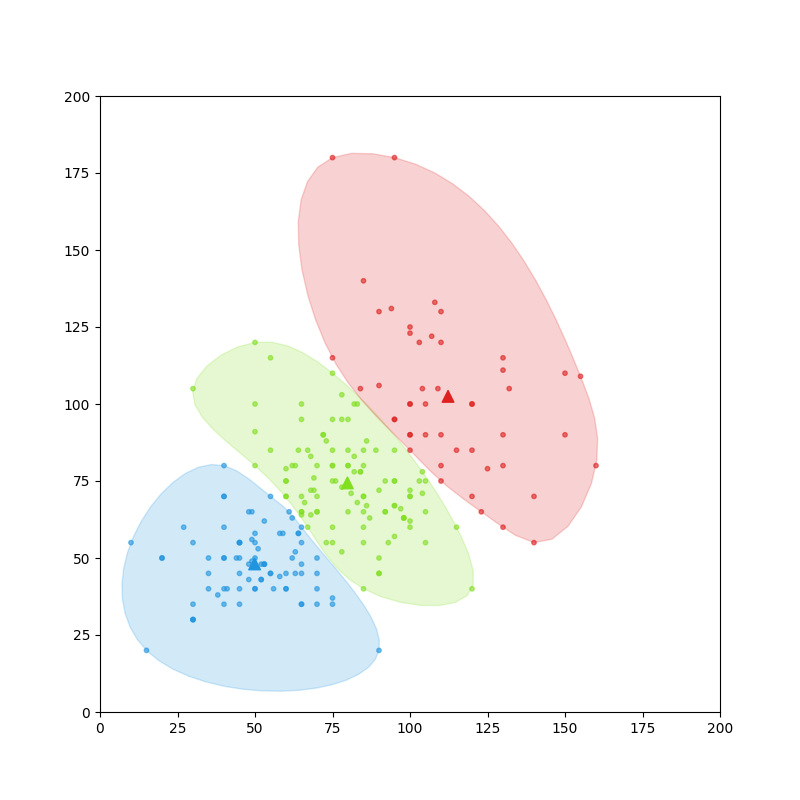

In [10]:
from scipy import interpolate
fig, ax = plt.subplots(1, figsize=(8,8))
plt.scatter(df.Attack, df.Defense, c=df.c, alpha = 0.6, s=10)
plt.scatter(cen_x, cen_y, marker='^', c=colors, s=70)

for i in df.cluster.unique():
    # get the convex hull
    points = df[df.cluster == i][['Attack', 'Defense']].values
    hull = ConvexHull(points)
    x_hull = np.append(points[hull.vertices,0],
                       points[hull.vertices,0][0])
    y_hull = np.append(points[hull.vertices,1],
                       points[hull.vertices,1][0])

    # interpolate
    dist = np.sqrt((x_hull[:-1] - x_hull[1:])**2 + (y_hull[:-1] - y_hull[1:])**2)
    dist_along = np.concatenate(([0], dist.cumsum()))
    spline, u = interpolate.splprep([x_hull, y_hull],
                                    u=dist_along, s=0, per=1)
    interp_d = np.linspace(dist_along[0], dist_along[-1], 50)
    interp_x, interp_y = interpolate.splev(interp_d, spline)
    # plot shape
    plt.fill(interp_x, interp_y, '--', c=colors[i], alpha=0.2)

plt.xlim(0,200)
plt.ylim(0,200)

C:\Users\Антон\PycharmProjects\cluster_vizualization\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Антон\PycharmProjects\cluster_vizualization\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


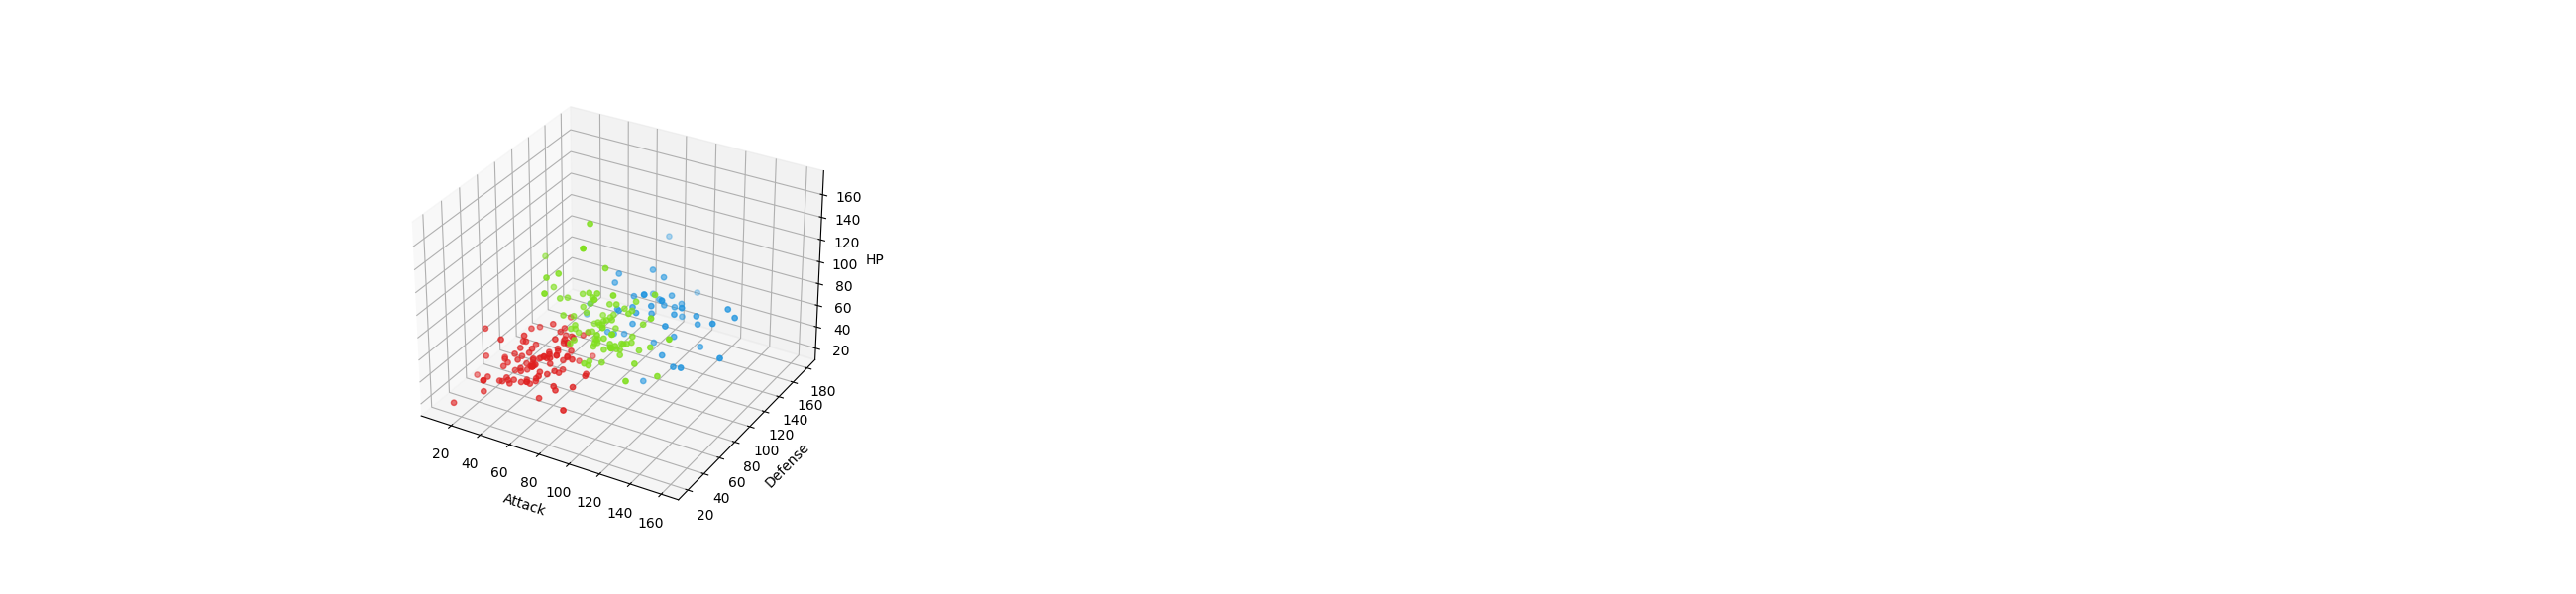

In [11]:
### BUILD A TWO DIMENSIONS CLUSTER AGAIN ###
# k means
kmeans = KMeans(n_clusters=3, random_state=0)
df['cluster'] = kmeans.fit_predict(df[['Attack', 'Defense', 'HP']])
# get centroids
centroids = kmeans.cluster_centers_
cen_x = [i[0] for i in centroids]
cen_y = [i[1] for i in centroids]
cen_z = [i[2] for i in centroids]
## add to df
df['cen_x'] = df.cluster.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2]})
df['cen_y'] = df.cluster.map({0:cen_y[0], 1:cen_y[1], 2:cen_y[2]})
df['cen_z'] = df.cluster.map({0:cen_z[0], 1:cen_z[1], 2:cen_z[2]})
# define and map colors
colors = ['#DF2020', '#81DF20', '#2095DF']
df['c'] = df.cluster.map({0:colors[0], 1:colors[1], 2:colors[2]})
#####PLOT#####

from mpl_toolkits.mplot3d import Axes3D
%matplotlib widget
df['cluster'] = kmeans.fit_predict(df[['Attack', 'Defense', 'HP']])
df['c'] = df.cluster.map({0:colors[0], 1:colors[1], 2:colors[2]})
fig = plt.figure(figsize=(26,6))
ax = fig.add_subplot(131, projection='3d')
ax.scatter(df.Attack, df.Defense, df.HP, c=df.c, s=15)
ax.set_xlabel('Attack')
ax.set_ylabel('Defense')
ax.set_zlabel('HP')
plt.show()

# from matplotlib.lines import Line2D
# fig, ax = plt.subplots(1, figsize=(8,8,8))
# # plot data
# plt.scatter(df.Attack, df.Defense, c=df.c, alpha = 0.6, s=10)
# # create a list of legend elemntes
# ## markers / records
# legend_elements = [Line2D([0], [0], marker='o', color='w', label='Cluster {}'.format(i+1),
#                markerfacecolor=mcolor, markersize=5) for i, mcolor in enumerate(colors)]
# # plot legend
# plt.legend(handles=legend_elements, loc='upper right')
# # title and labels
# plt.title('Pokemon Stats\n', loc='left', fontsize=22)
# plt.xlabel('Attack')
# plt.ylabel('Defense')
# plt.zlabel('HP')

AttributeError: 'Axes3DSubplot' object has no attribute 'xlabel'

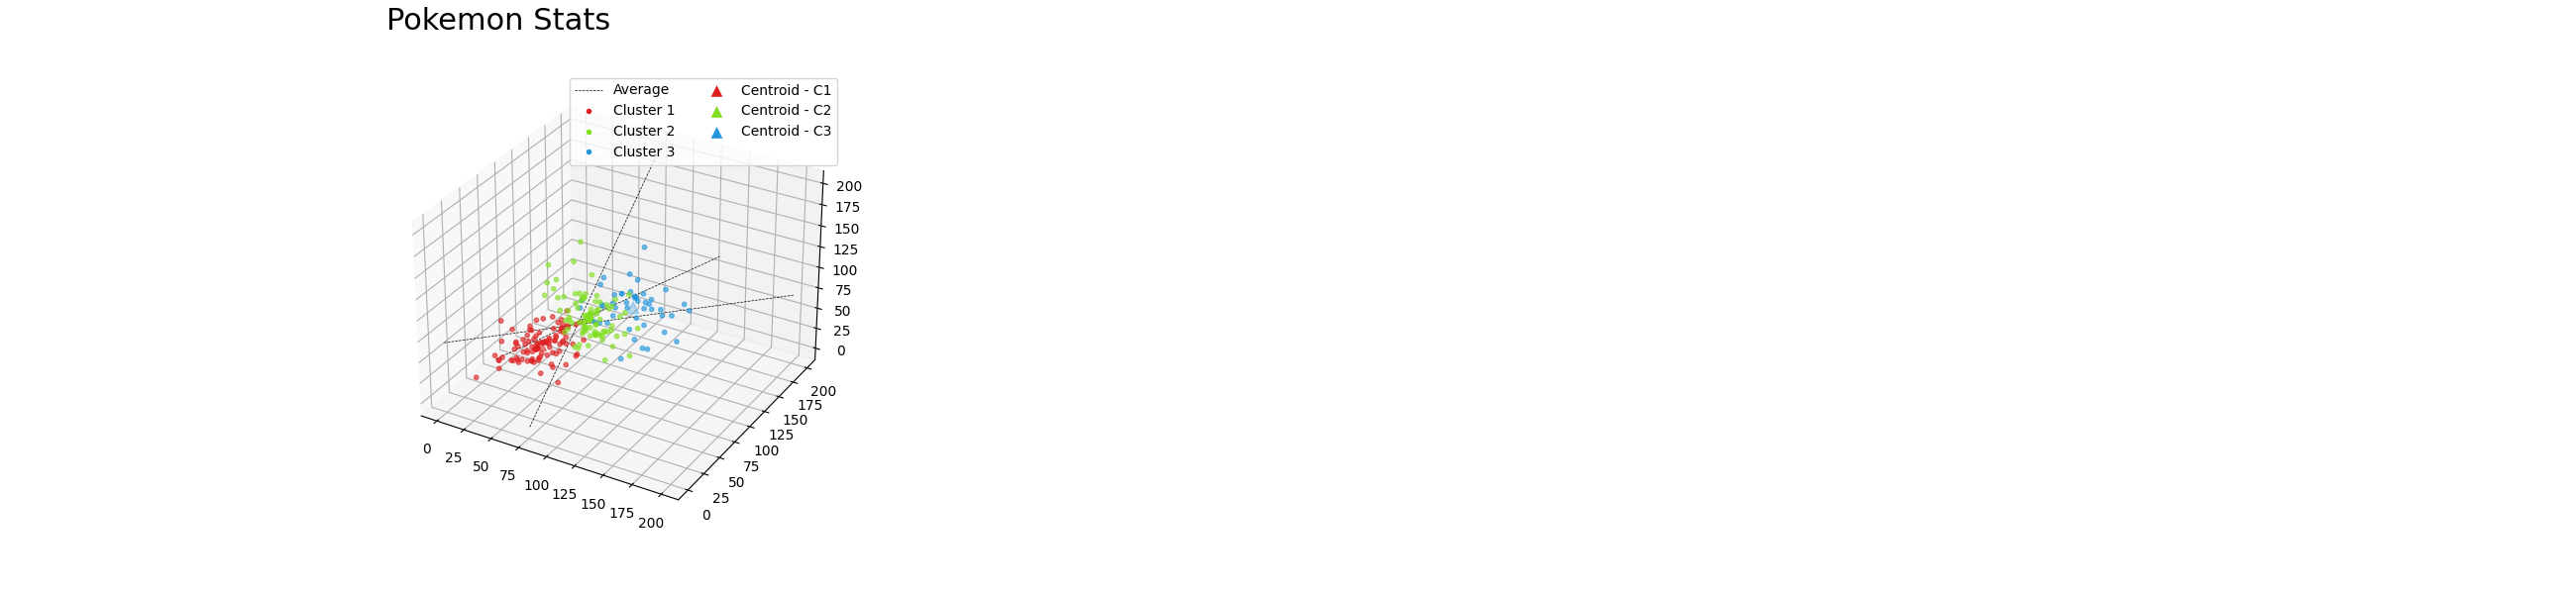

In [12]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib widget
fig = plt.figure(figsize=(26,6))
ax = fig.add_subplot(131, projection='3d')
# fig, ax = plt.subplots(1, figsize=(8,8))
# plot data
ax.scatter(df.Attack, df.Defense, df.HP, c=df.c, alpha = 0.6, s=10)
# plot centroids
ax.scatter(cen_x, cen_y, cen_z, marker='^', c=colors, s=70)
# plot Attack mean
ax.plot([df.Attack.mean()]*2, [0,200], [0, 200], color='black', lw=0.5, linestyle='--')
# ax.xlim(0,200)
# plot Defense mean
ax.plot([0,200], [df.Defense.mean()]*2, [0, 200], color='black', lw=0.5, linestyle='--')
# ax.ylim(0,200)
# plot HP mean
ax.plot([0,200], [0, 200], [df.HP.mean()]*2, color='black', lw=0.5, linestyle='--')
# ax.ylim(0,200)
# create a list of legend elemntes
## average line
legend_elements = [Line2D([0], [0], color='black', lw=0.5, linestyle='--', label='Average')]
## markers / records
cluster_leg = [Line2D([0], [0], marker='o', color='w', label='Cluster {}'.format(i+1),
               markerfacecolor=mcolor, markersize=5) for i, mcolor in enumerate(colors)]
## centroids
cent_leg = [Line2D([0], [0], marker='^', color='w', label='Centroid - C{}'.format(i+1),
            markerfacecolor=mcolor, markersize=10) for i, mcolor in enumerate(colors)]
# add all elements to the same list
legend_elements.extend(cluster_leg)
legend_elements.extend(cent_leg)
# plot legend
plt.legend(handles=legend_elements, loc='upper right', ncol=2)
# title and labels
plt.title('Pokemon Stats\n', loc='left', fontsize=22)
ax.xlabel('Attack')
ax.ylabel('Defense')
ax.zlabel('HP')

<class 'numpy.ndarray'> (101, 3)
<class 'numpy.ndarray'> (87, 3)
<class 'numpy.ndarray'> (46, 3)


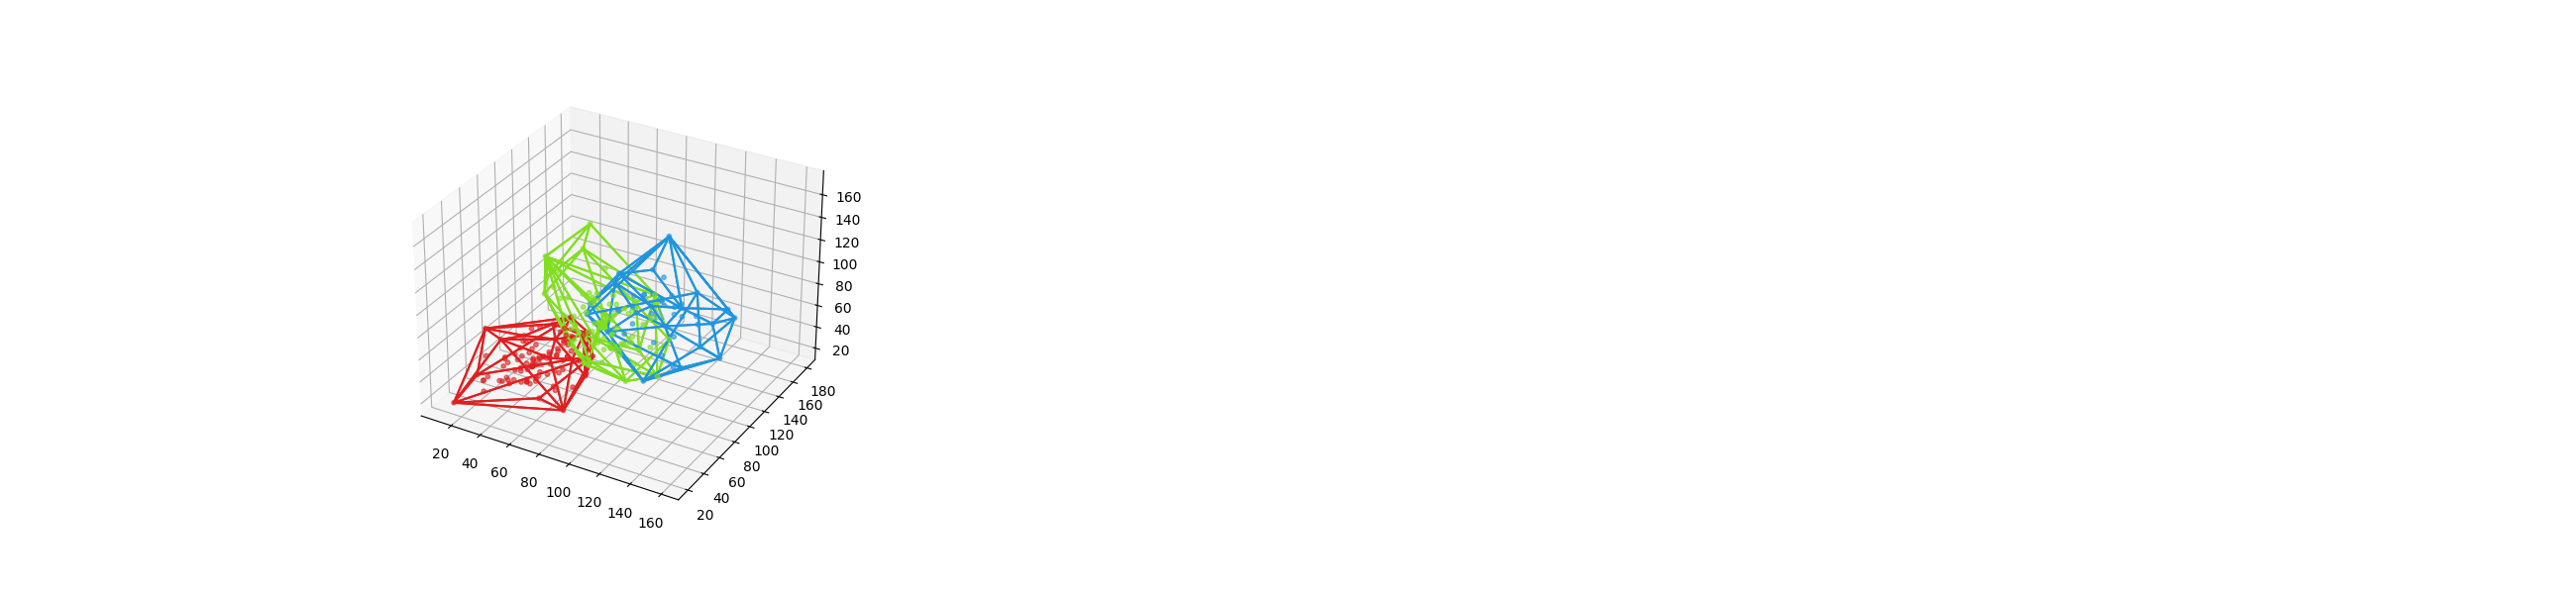

In [13]:
from scipy.spatial import ConvexHull
import numpy as np

from mpl_toolkits.mplot3d import Axes3D
%matplotlib widget
fig = plt.figure(figsize=(26,6))
ax = fig.add_subplot(131, projection='3d')

# plot data
ax.scatter(df.Attack, df.Defense, df.HP, c=df.c, alpha = 0.6, s=10)
# plot centers
ax.scatter(cen_x, cen_y, cen_z, marker='^', c=colors, s=70)
# draw enclosure
for i in df.cluster.unique():
    points = df[df.cluster == i][['Attack', 'Defense', 'HP']].values
    # get convex hull
    print(type(points), points.shape)
    hull = ConvexHull(points)
    # get x and y coordinates
    # repeat last point to close the polygon
    # x_hull = np.append(points[hull.vertices,0],
    #                    points[hull.vertices,0][0])
    # y_hull = np.append(points[hull.vertices,1],
    #                    points[hull.vertices,1][0])
    # z_hull = np.append(points[hull.vertices,2],
    #                    points[hull.vertices,2][0])
    # plot shape
    # ax.fill(x_hull, y_hull, z_hull, alpha=0.3, c=colors[i])
    for s in hull.simplices:
        s = np.append(s, s[0])  # Here we cycle back to the first coordinate
        ax.plot(points[s, 0], points[s, 1], points[s, 2], colors[i])

# ax.xlim(0,200)
# ax.ylim(0,200)

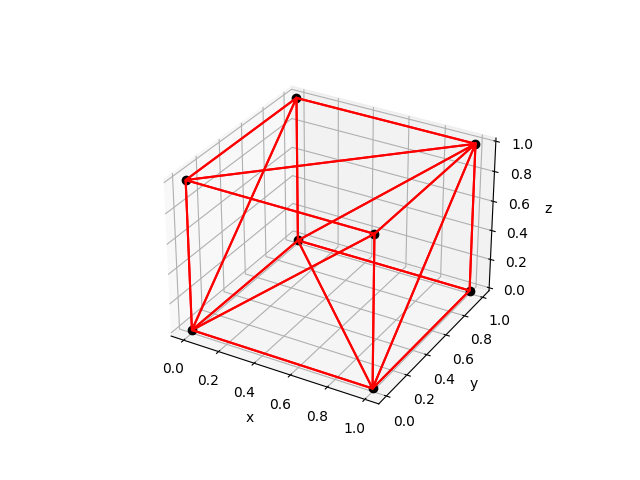

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.spatial import ConvexHull


# 8 points defining the cube corners
pts = np.array([[0, 0, 0], [1, 0, 0], [1, 1, 0], [0, 1, 0],
                [0, 0, 1], [1, 0, 1], [1, 1, 1], [0, 1, 1], ])

hull = ConvexHull(pts)

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

# Plot defining corner points
ax.plot(pts.T[0], pts.T[1], pts.T[2], "ko")

# 12 = 2 * 6 faces are the simplices (2 simplices per square face)
for s in hull.simplices:
    s = np.append(s, s[0])  # Here we cycle back to the first coordinate
    ax.plot(pts[s, 0], pts[s, 1], pts[s, 2], "r-")

# Make axis label
for i in ["x", "y", "z"]:
    eval("ax.set_{:s}label('{:s}')".format(i, i))

plt.show()

<class 'numpy.ndarray'> (101, 3)
[[50 17 23]
 [58 17 23]
 [38 17 53]
 [38 58 53]
 [38 58 17]
 [29 58 53]
 [57 17 53]
 [20 50 17]
 [30 29 58]
 [30 58 23]
 [30 50 23]
 [30 33 50]
 [30 29 71]
 [30 33 71]
 [15 57 53]
 [15 63 53]
 [15 57 17]
 [15 20 17]
 [15 20 85]
 [15 63 85]
 [87 33 50]
 [87 20 50]
 [87 20 85]
 [48 63 53]
 [48 29 53]
 [83 87 33]
 [83 48 63]
 [83 63 85]
 [83 87 85]
 [83 33 71]
 [83 29 71]
 [83 48 29]]


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (4,) + inhomogeneous part.

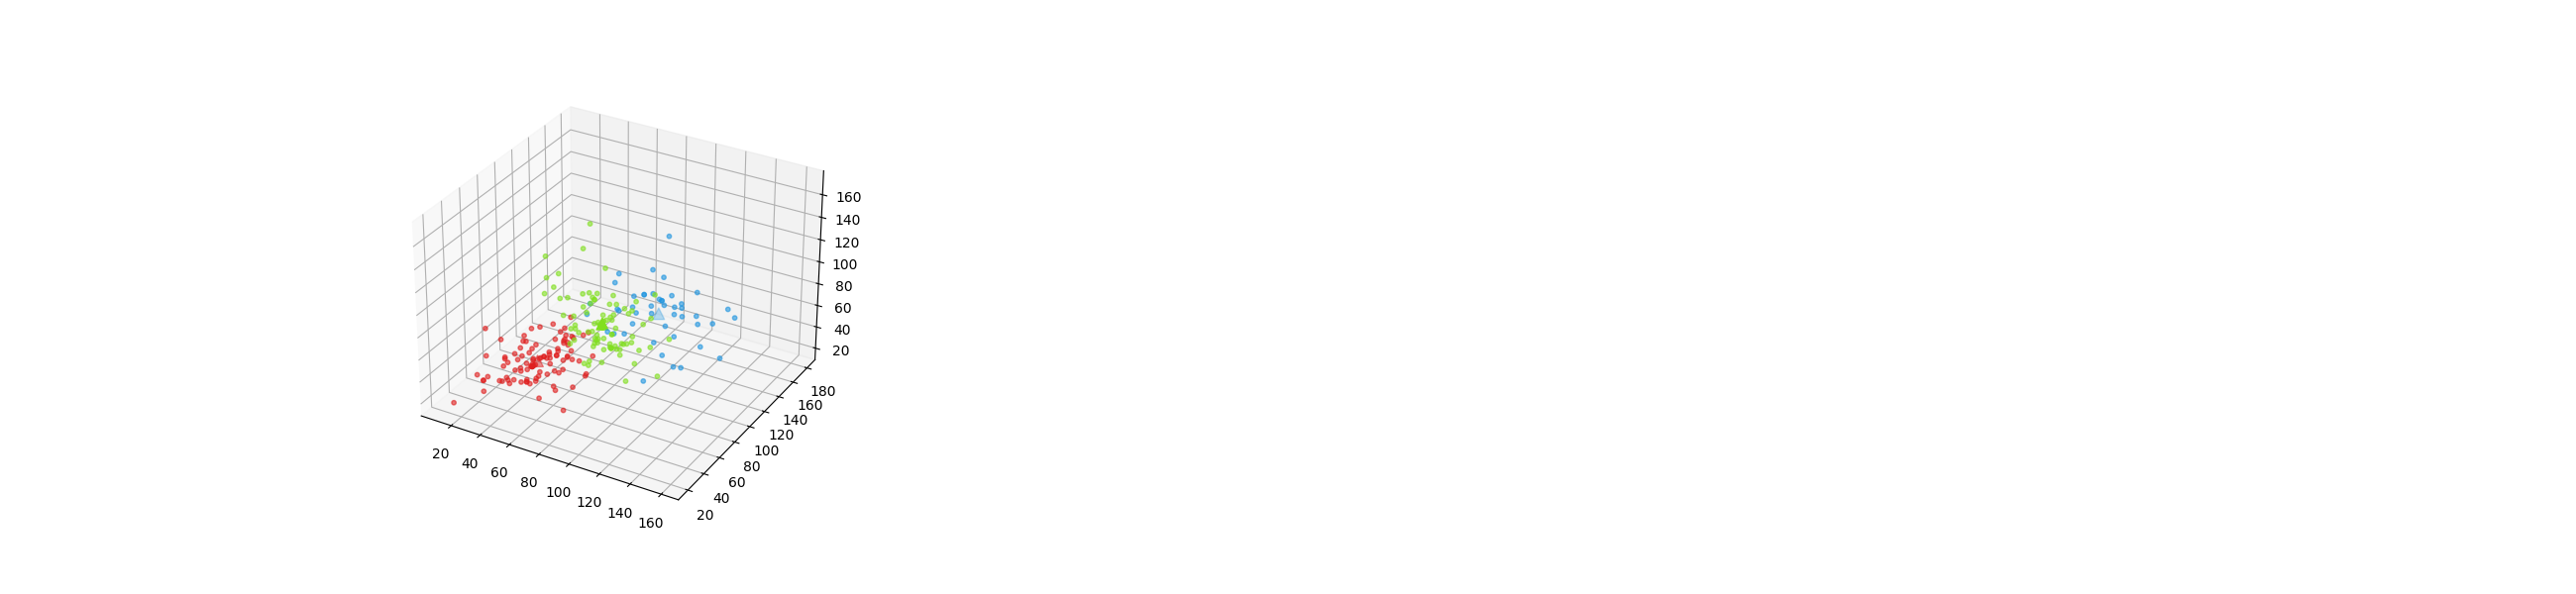

In [26]:
from scipy.spatial import ConvexHull
from scipy.interpolate import RegularGridInterpolator as rgi
import numpy as np

from mpl_toolkits.mplot3d import Axes3D
%matplotlib widget
fig = plt.figure(figsize=(26,6))
ax = fig.add_subplot(131, projection='3d')

# plot data
ax.scatter(df.Attack, df.Defense, df.HP, c=df.c, alpha = 0.6, s=10)
# plot centers
ax.scatter(cen_x, cen_y, cen_z, marker='^', c=colors, s=70)
# draw enclosure
for i in df.cluster.unique():
    points = df[df.cluster == i][['Attack', 'Defense', 'HP']].values
    print(type(points), points.shape)
    hull = ConvexHull(points)
    print(hull.simplices)
    k = []
    for s in sorted(hull.simplices, key=lambda x: x[0]):
        s = np.append(s, s[0])  # Here we cycle back to the first coordinate
        k.append([points[s, 0], points[s, 1], points[s, 2], colors[i]])
        # ax.plot(points[s, 0], points[s, 1], points[s, 2], colors[i])
    #     s = np.append(s, s[0])  # Here we cycle back to the first coordinate
    #     ax.plot(points[s, 0], points[s, 1], points[s, 2], colors[i])

    # get the convex hull
    x_hull = np.append(points[hull.vertices,0],
                       points[hull.vertices,0][0])
    y_hull = np.append(points[hull.vertices,1],
                       points[hull.vertices,1][0])
    z_hull = np.append(points[hull.vertices,2],
                       points[hull.vertices,2][0])

    # interpolate
    dist = np.sqrt((x_hull[:-1] - x_hull[1:])**2 + (y_hull[:-1] - y_hull[1:])**2 + (z_hull[:-1] - z_hull[1:])**2)
    dist_along = np.concatenate(([0], dist.cumsum()))
    # print(x_hull, y_hull, z_hull)
    spline, u = rgi(k, values=dist_along)
    print(1)
    interp_d = np.linspace(dist_along[0], dist_along[-1], 50)
    interp_x, interp_y, interp_z = interpolate.splev(interp_d, spline)
    # plot shape
    plt.fill(interp_x, interp_y, interp_z, '--', c=colors[i], alpha=0.2)

# plt.xlim(0,200)
# plt.ylim(0,200)

In [35]:
import open3d as o3d
import trimesh
import pyvista as pv
import plotly.express as px # for data visualization


from scipy.spatial import ConvexHull
import numpy as np

from mpl_toolkits.mplot3d import Axes3D
%matplotlib widget
fig = px.scatter_3d(df, x='Attack', y='Defense', z='HP', height=900, width=950)
# fig = plt.figure(figsize=(26,6))
# ax = fig.add_subplot(131, projection='3d')

# plot data
# ax.scatter(df.Attack, df.Defense, df.HP, c=df.c, alpha = 0.6, s=10)
# plot centers
# ax.scatter(cen_x, cen_y, cen_z, marker='^', c=colors, s=70)
# draw enclosure
for i in df.cluster.unique():
    points = df[df.cluster == i][['Attack', 'Defense', 'HP']].values

    cloud = trimesh.PointCloud(points)
    cloud.convex_hull

    # # estimate radius for rolling ball
    # distances = pcd.compute_nearest_neighbor_distance()
    # avg_dist = np.mean(distances)
    # radius = 1.5 * avg_dist
    #
    # mesh = o3d.geometry.TriangleMesh.create_from_point_cloud_ball_pivoting(
    #            pcd,
    #            o3d.utility.DoubleVector([radius, radius * 2]))
    #
    # # create the triangular mesh with the vertices and faces from open3d
    # tri_mesh = trimesh.Trimesh(np.asarray(mesh.vertices), np.asarray(mesh.triangles),
    #                           vertex_normals=np.asarray(mesh.vertex_normals))
    #
    # trimesh.convex.is_convex(tri_mesh)